In [ ]:
## for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.cm as cm

In [ ]:
# This dataset contains information to compute the target, as a function of several parameters
wine = datasets.load_wine()

In [ ]:
x = wine.data  # we only take the first two features.
y = wine.target

#print (x)
#print (y)

In [ ]:
targets = wine.target_names
n_targets = len(targets)
features = wine.feature_names
n_features = len(features)

#print (n_targets)
#print (n_features)
#print (targets)
#print (features)


<ipython-input-6-f5beae9b4afb>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


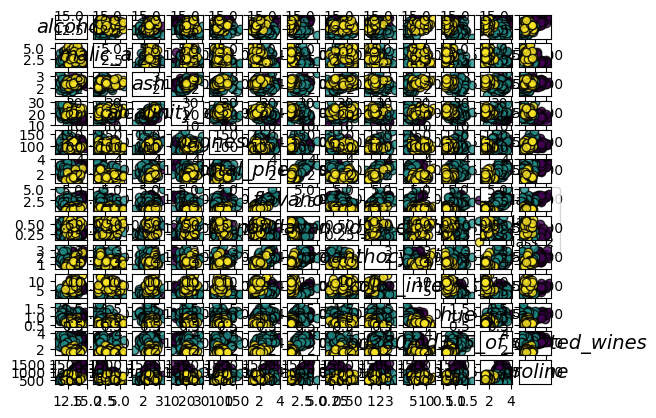

In [ ]:
# Plot pairs of variables
cmap = cm.get_cmap('viridis')
fig, axs = plt.subplots(n_features, n_features)

for i in range(n_features):
    for j in range(n_features):
        if i != j:
            for k in range(n_targets):
                axs[i, j].scatter(x[y==k,j], x[y==k,i], label = targets[k], color = cmap(k/(n_targets-1)),
                                  alpha=0.8, edgecolor='k')
        else:
            axs[i, j].text(0.5, 0.5, features[i], horizontalalignment='center',
                           verticalalignment='center', style='italic', fontsize=14)
            axs[i, j].xaxis.set_visible(False)
            axs[i, j].yaxis.set_visible(False)


axs[n_features//2 - 1, n_features-1].legend(bbox_to_anchor=(1.5, 0.1))
plt.subplots_adjust(right=0.90)
plt.show()

In [ ]:
#Evaluación de modelos usando k-folds cross validation (k = 5)
n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

In [ ]:
# SVM con kernel lineal
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

acc = 0

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_cv = SVC(kernel = 'linear')
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)

# Model performance
print("Modelo SVM con kernel lineal:")
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Print average performance
acc = acc/n_folds
print('Exactitud del modelo: ', acc)

Modelo SVM con kernel lineal:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        59
           1       0.97      0.93      0.95        71
           2       0.94      0.98      0.96        48

    accuracy                           0.96       178
   macro avg       0.96      0.96      0.96       178
weighted avg       0.96      0.96      0.96       178

Exactitud del modelo:  0.9609523809523809


In [ ]:
# SVM con kernel radial
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
clf = SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

acc = 0

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_cv = SVC(kernel = 'rbf')
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)

# Model performance
print("Modelo SVM con kernel de base radial:")
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Print average performance
acc = acc/n_folds
print('Exactitud del modelo: ', acc)


Modelo SVM con kernel de base radial:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        59
           1       0.64      0.80      0.71        71
           2       0.45      0.29      0.35        48

    accuracy                           0.69       178
   macro avg       0.66      0.65      0.65       178
weighted avg       0.67      0.69      0.67       178

Exactitud del modelo:  0.6855555555555555


In [ ]:
# KNN con k = 3
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

acc = 0

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_cv = KNeighborsClassifier(n_neighbors=3)
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)

# Model performance
print("Modelo KNN con k=3:")
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Print average performance
acc = acc/n_folds
print('Exactitud del modelo: ', acc)


Modelo KNN con k=3:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        59
           1       0.75      0.76      0.76        71
           2       0.62      0.54      0.58        48

    accuracy                           0.75       178
   macro avg       0.73      0.73      0.73       178
weighted avg       0.74      0.75      0.74       178

Exactitud del modelo:  0.7471428571428571


In [ ]:
# Árbol de decisión
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

acc = 0

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_cv = DecisionTreeClassifier()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)

# Model performance
print("Modelo de árbol de decisión:")
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Print average performance
acc = acc/n_folds
print('Exactitud del modelo: ', acc)


Modelo de árbol de decisión:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        59
           1       0.87      0.83      0.85        71
           2       0.82      0.85      0.84        48

    accuracy                           0.88       178
   macro avg       0.87      0.88      0.88       178
weighted avg       0.88      0.88      0.88       178

Exactitud del modelo:  0.8760317460317459


In [ ]:
# Clasificador con proceso Gaussiano
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
clf = GaussianProcessClassifier()
clf.fit(X_train, y_train)

acc = 0

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_cv = GaussianProcessClassifier()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)

# Model performance
print("Modelo clasificador con proceso Gaussiano:")
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Print average performance
acc = acc/n_folds
print('Exactitud del modelo: ', acc)



Modelo clasificador con proceso Gaussiano:
              precision    recall  f1-score   support

           0       0.89      0.29      0.44        59
           1       0.84      0.37      0.51        71
           2       0.34      0.92      0.50        48

    accuracy                           0.49       178
   macro avg       0.69      0.52      0.48       178
weighted avg       0.72      0.49      0.48       178

Exactitud del modelo:  0.489047619047619
